# Tarea Álgebra - Maestría en Ciencia de Datos, CUCEA, UdG
## Héctor Gabriel Sánchez Pérez
### 12 de Junio de 2025

Resolver los siguientes ejercicios sobre ´algebra lineal. Escribir procedimiento completo.


In [82]:
# Importar Librerias 
import sympy 
from sympy.matrices.exceptions import NonInvertibleMatrixError
from IPython.display import display, Markdown # Para mejor formato en Jupyter/Colab

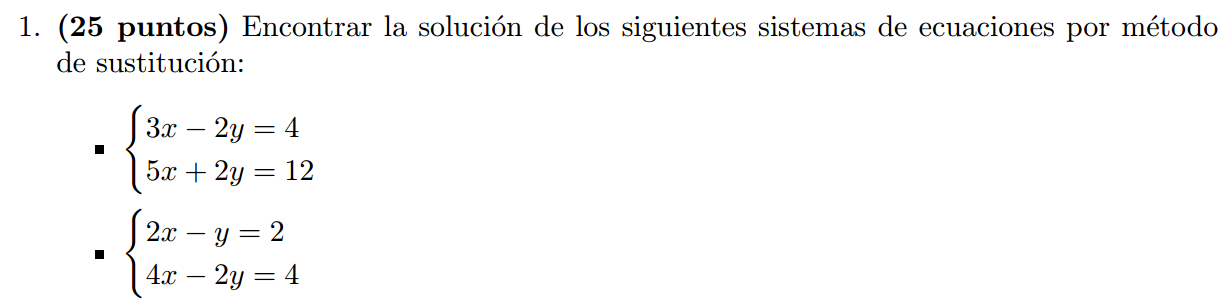

In [15]:
# PRIMER PROBLEMA 

# Paso 1: Definir las variables 
x, y = sympy.symbols('x y')

# Paso 2: Definir las ecuaciones 
eq1 = sympy.Eq(3*x - 2*y, 4)
eq2 = sympy.Eq(5*x + 2*y, 12)
print("Ecuaciones:")
display(eq1)
display(eq2)

# Paso 3: Despejar una variable de una de las ecuaciones 
y_expr_from_eq1 = sympy.solve(eq1, y)
print("Despejando y de la primera ecuación:")
display(y_expr_from_eq1)

# Paso 4: Sustituir la variable despejada en la otra ecuación
eq2_substituted = eq2.subs(y, y_expr_from_eq1[0]) # [0] porque solve devuelve una lista
print("Sustituyendo y en la segunda ecuación:")
display(eq2_substituted)

# Paso 5: Resolver la ecuación resultante para x
x_solution = sympy.solve(eq2_substituted, x)[0]  # [0] porque solve devuelve una lista
print("Solución para x:")
display(x_solution)

# Paso 6: Sustituir x en la expresión de y
y_solution = y_expr_from_eq1[0].subs(x, x_solution)
print("Solución para y:")
display(y_solution)

# Paso 7: Mostrar las soluciones finales
print("Soluciones finales:")
print(f"x = {x_solution}, y = {y_solution}")


Ecuaciones:


Eq(3*x - 2*y, 4)

Eq(5*x + 2*y, 12)

Despejando y de la primera ecuación:


[3*x/2 - 2]

Sustituyendo y en la segunda ecuación:


Eq(8*x - 4, 12)

Solución para x:


2

Solución para y:


1

Soluciones finales:
x = 2, y = 1


In [27]:
# SEGUNDO PROBLEMA 

# Paso 1: Definir las variables 
x, y = sympy.symbols('x y')

# Paso 2: Definir las ecuaciones
eq3 = sympy.Eq(2*x - y, 2)
eq4 = sympy.Eq(4*x - 2*y, 4)
print("Ecuaciones:")
display(eq3)
display(eq4)

# Paso 3: Despejar una variable de una de las ecuaciones 
solutions_for_y_eq3 = sympy.solve(eq3, y)
y_expr_from_eq3 = solutions_for_y_eq3[0]
print("Despejando y de la primera ecuación:")
display(sympy.Eq(y, y_expr_from_eq3))

# Paso 4: Sustituir la variable despejada en la otra ecuación
eq4_substituted = eq4.subs(y, y_expr_from_eq3)
print("Sustituyendo y en la segunda ecuación:")
display(eq4_substituted)

# Paso 5: Resolver la ecuación resultante para x
simplified_eq4 = sympy.simplify(eq4_substituted)
print("  La ecuación sustituida se simplifica a:")
display(simplified_eq4)

# Dado que Sympy nos da TRUE, esto significa que las ecuaciones tienen infinitas soluciones
print("La ecuación es una identidad, lo que significa que las dos ecuaciones son equivalentes.")


Ecuaciones:


Eq(2*x - y, 2)

Eq(4*x - 2*y, 4)

Despejando y de la primera ecuación:


Eq(y, 2*x - 2)

Sustituyendo y en la segunda ecuación:


True

  La ecuación sustituida se simplifica a:


True

La ecuación es una identidad, lo que significa que las dos ecuaciones son equivalentes.


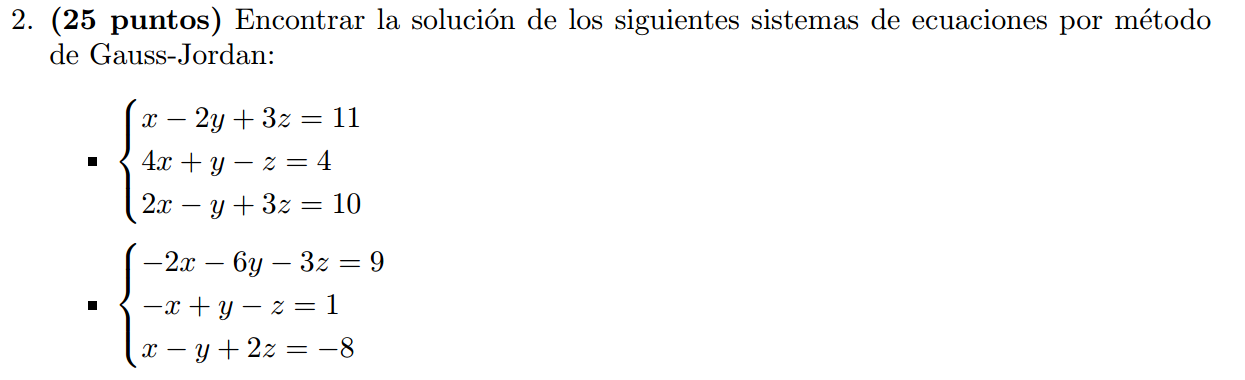

In [43]:
# PRIMER PROBLEMA 

#  Paso 0: Definir las variables
x, y, z = sympy.symbols('x y z')


# Paso 1: Formar la matriz  de coeficientes
M = sympy.Matrix([
    [1, -2,  3, 11],
    [4,  1, -1,  4],
    [2, -1,  3, 10]
])
print("Paso 1: Matriz Aumentada Inicial")
display(M)


# Paso 2: Trabajar en la primera columna.
# Hacer que el primer elemento sea 1 (ya lo es) y hacer que los otros elementos de la columna sean 0.
M[1,:] = M[1,:] - 4 * M[0,:] # R2_new = R2_old - 4 * R1
M[2,:] = M[2,:] - 2 * M[0,:] # R3_new = R3_old - 2 * R1
display(Markdown("`R2 = R2 - 4*R1` y `R3 = R3 - 2*R1`"))
display(M)

print("\nPaso 3a: Intercambiar R2 y R3 para un pivote más simple, luego normalizar R2.")
M.row_swap(1, 2) # Intercambia fila 1 (índice 1) con fila 2 (índice 2)
display(Markdown("Intercambiamos R2 y R3 (`M.row_swap(1,2)`):"))
display(M)

# Ahora, normalizar la nueva R2: R2 = R2 / 3
M[1,:] = M[1,:] / 3
display(Markdown("Normalizamos la nueva R2 (`R2 = R2 / 3`):"))
display(M)

print("\nPaso 3b: Hacer ceros en la segunda columna arriba y abajo del pivote M[1,1]=1")
M[0,:] = M[0,:] + 2 * M[1,:] # R1_new = R1_old + 2 * R2_new (porque M[0,1] era -2)
M[2,:] = M[2,:] - 9 * M[1,:] # R3_new = R3_old - 9 * R2_new
display(Markdown("`R1 = R1 + 2*R2` y `R3 = R3 - 9*R2`"))
display(M)

# Paso 4: Trabajar en la tercera columna.
# Hacer el pivote M[2,2] (ahora M[2,2] en la submatriz 3x3, o M[2,2] del original) igual a 1.
# M[2,2] es -4. Dividimos R3 por -4: R3 = R3 / (-4)
print("\nPaso 4a: Normalizar R3 para que el pivote M[2,2]=1")
M[2,:] = M[2,:] / (-4)
display(Markdown("`R3 = R3 / (-4)`"))
display(M)

# Hacer cero los elementos arriba del pivote M[2,2]=1.
# R1 = R1 - 1*R3 (para eliminar M[0,2] que es 1)
# R2 = R2 + 1*R3 (para eliminar M[1,2] que es -1)
print("\nPaso 4b: Hacer ceros en la tercera columna arriba del pivote M[2,2]=1")
M[0,:] = M[0,:] - 1 * M[2,:] # R1_new = R1_old - R3_new
M[1,:] = M[1,:] + 1 * M[2,:] # R2_new = R2_old + R3_new
display(Markdown("`R1 = R1 - R3` y `R2 = R2 + R3`"))
display(M)


# Paso 5: Extraer la solución
# La última columna de la matriz RREF contiene los valores de x, y, z.
sol_x = M[0,3]
sol_y = M[1,3]
sol_z = M[2,3]
print("\nSolución del sistema:")
print(f"x = {sol_x}")
print(f"y = {sol_y}")
print(f"z = {sol_z}")
print("")


# También podemos usar la función rref() de Sympy para obtener el resultado directamente
# y verificar nuestro proceso manual.
M_original = sympy.Matrix([
    [1, -2,  3, 11],
    [4,  1, -1,  4],
    [2, -1,  3, 10]
])

rref_matrix, pivot_columns = M_original.rref()
print("Matriz RREF directa:")
display(rref_matrix)
print("Columnas pivote:")
display(pivot_columns)


Paso 1: Matriz Aumentada Inicial


Matrix([
[1, -2,  3, 11],
[4,  1, -1,  4],
[2, -1,  3, 10]])

`R2 = R2 - 4*R1` y `R3 = R3 - 2*R1`

Matrix([
[1, -2,   3,  11],
[0,  9, -13, -40],
[0,  3,  -3, -12]])


Paso 3a: Intercambiar R2 y R3 para un pivote más simple, luego normalizar R2.


Intercambiamos R2 y R3 (`M.row_swap(1,2)`):

Matrix([
[1, -2,   3,  11],
[0,  3,  -3, -12],
[0,  9, -13, -40]])

Normalizamos la nueva R2 (`R2 = R2 / 3`):

Matrix([
[1, -2,   3,  11],
[0,  1,  -1,  -4],
[0,  9, -13, -40]])


Paso 3b: Hacer ceros en la segunda columna arriba y abajo del pivote M[1,1]=1


`R1 = R1 + 2*R2` y `R3 = R3 - 9*R2`

Matrix([
[1, 0,  1,  3],
[0, 1, -1, -4],
[0, 0, -4, -4]])


Paso 4a: Normalizar R3 para que el pivote M[2,2]=1


`R3 = R3 / (-4)`

Matrix([
[1, 0,  1,  3],
[0, 1, -1, -4],
[0, 0,  1,  1]])


Paso 4b: Hacer ceros en la tercera columna arriba del pivote M[2,2]=1


`R1 = R1 - R3` y `R2 = R2 + R3`

Matrix([
[1, 0, 0,  2],
[0, 1, 0, -3],
[0, 0, 1,  1]])


Solución del sistema:
x = 2
y = -3
z = 1

Matriz RREF directa:


Matrix([
[1, 0, 0,  2],
[0, 1, 0, -3],
[0, 0, 1,  1]])

Columnas pivote:


(0, 1, 2)

In [52]:
# SEGUNDO PROBLEMA 

#  Paso 0: Definir las variables
x, y, z = sympy.symbols('x y z')

# Paso 1: Formar la matriz  de coeficientes 
M2 = sympy.Matrix([
    [-2, -6, -3,  9],
    [-1,  1, -1,  1],
    [ 1, -1,  2, -8]
])

print("Paso 1: Matriz Aumentada Inicial")
display(M2)


# Paso 2: Trabajar en la primera columna.
# Queremos un 1 en M2[0,0]. Podemos intercambiar R1 con R3.
print("\nPaso 2a: Intercambiar R1 y R3 para obtener un pivote 1 en M2[0,0]")
M2.row_swap(0, 2) # R1 <-> R3
display(Markdown("`R1 <-> R3`"))
display(M2)

# Hacer cero los elementos debajo del pivote M2[0,0]=1.
# R2 = R2 + R1
# R3 = R3 + 2*R1
print("\nPaso 2b: Hacer ceros en la primera columna debajo del pivote M2[0,0]=1")
M2[1,:] = M2[1,:] + M2[0,:]      # R2_new = R2_old + R1_new
M2[2,:] = M2[2,:] + 2 * M2[0,:]  # R3_new = R3_old + 2 * R1_new
display(Markdown("`R2 = R2 + R1` y `R3 = R3 + 2*R1`"))
display(M2)

# Paso 3: Trabajar en la segunda columna.
# El elemento M2[1,1] es 0. Necesitamos intercambiar R2 con una fila inferior
# que tenga un valor no nulo en la segunda columna. Intercambiamos R2 con R3.
print("\nPaso 3a: M2[1,1] es 0. Intercambiar R2 y R3.")
M2.row_swap(1, 2) # R2 <-> R3
display(Markdown("`R2 <-> R3`"))
display(M2)

# Hacer el pivote M2[1,1] igual a 1. M2[1,1] es -8.
# R2 = R2 / (-8)
print("\nPaso 3b: Normalizar R2 para que el pivote M2[1,1]=1")
M2[1,:] = M2[1,:] / (-8)
display(Markdown("`R2 = R2 / (-8)`"))
display(M2)

# Hacer cero el elemento M2[0,1] (que es -1) usando el pivote M2[1,1]=1.
# R1 = R1 + R2
print("\nPaso 3c: Hacer cero M2[0,1] usando el pivote M2[1,1]=1")
M2[0,:] = M2[0,:] + M2[1,:] # R1_new = R1_old + R2_new
display(Markdown("`R1 = R1 + R2`"))
display(M2)

# Paso 4: Trabajar en la tercera columna.
# El pivote M2[2,2] ya es 1.
# Hacer cero los elementos arriba del pivote M2[2,2]=1.
# M2[0,2] es 15/8.  R1 = R1 - (15/8)*R3
# M2[1,2] es -1/8. R2 = R2 + (1/8)*R3
print("\nPaso 4: Hacer ceros en la tercera columna arriba del pivote M2[2,2]=1")
# Usamos sympy.Rational para mantener la precisión con las fracciones
coeff_r1_r3 = sympy.Rational(15,8)
coeff_r2_r3 = sympy.Rational(1,8)

M2[0,:] = M2[0,:] - coeff_r1_r3 * M2[2,:] # R1_new = R1_old - (15/8)*R3_new
M2[1,:] = M2[1,:] + coeff_r2_r3 * M2[2,:] # R2_new = R2_old + (1/8)*R3_new
display(Markdown("`R1 = R1 - (15/8)*R3` y `R2 = R2 + (1/8)*R3`"))
display(M2)

# Paso 5: Extraer la solución 
sol_x2 = M2[0,3]
sol_y2 = M2[1,3]
sol_z2 = M2[2,3]
print("\nSolución del sistema:")
print(f"x = {sol_x2}")
print(f"y = {sol_y2}")
print(f"z = {sol_z2}")
print("")

# También podemos usar la función rref() de Sympy para obtener el resultado directamente 
M2_original = sympy.Matrix([
    [-2, -6, -3,  9],
    [-1,  1, -1,  1],
    [ 1, -1,  2, -8]
])

rref_matrix2, pivot_columns2 = M2_original.rref()
print("\nVerificación con la función M.rref() de Sympy:")
print("Matriz RREF directa:")
display(rref_matrix2)
print("Columnas pivote:")
display(pivot_columns2)



Paso 1: Matriz Aumentada Inicial


Matrix([
[-2, -6, -3,  9],
[-1,  1, -1,  1],
[ 1, -1,  2, -8]])


Paso 2a: Intercambiar R1 y R3 para obtener un pivote 1 en M2[0,0]


`R1 <-> R3`

Matrix([
[ 1, -1,  2, -8],
[-1,  1, -1,  1],
[-2, -6, -3,  9]])


Paso 2b: Hacer ceros en la primera columna debajo del pivote M2[0,0]=1


`R2 = R2 + R1` y `R3 = R3 + 2*R1`

Matrix([
[1, -1, 2, -8],
[0,  0, 1, -7],
[0, -8, 1, -7]])


Paso 3a: M2[1,1] es 0. Intercambiar R2 y R3.


`R2 <-> R3`

Matrix([
[1, -1, 2, -8],
[0, -8, 1, -7],
[0,  0, 1, -7]])


Paso 3b: Normalizar R2 para que el pivote M2[1,1]=1


`R2 = R2 / (-8)`

Matrix([
[1, -1,    2,  -8],
[0,  1, -1/8, 7/8],
[0,  0,    1,  -7]])


Paso 3c: Hacer cero M2[0,1] usando el pivote M2[1,1]=1


`R1 = R1 + R2`

Matrix([
[1, 0, 15/8, -57/8],
[0, 1, -1/8,   7/8],
[0, 0,    1,    -7]])


Paso 4: Hacer ceros en la tercera columna arriba del pivote M2[2,2]=1


`R1 = R1 - (15/8)*R3` y `R2 = R2 + (1/8)*R3`

Matrix([
[1, 0, 0,  6],
[0, 1, 0,  0],
[0, 0, 1, -7]])


Solución del sistema:
x = 6
y = 0
z = -7


Verificación con la función M.rref() de Sympy:
Matriz RREF directa:


Matrix([
[1, 0, 0,  6],
[0, 1, 0,  0],
[0, 0, 1, -7]])

Columnas pivote:


(0, 1, 2)

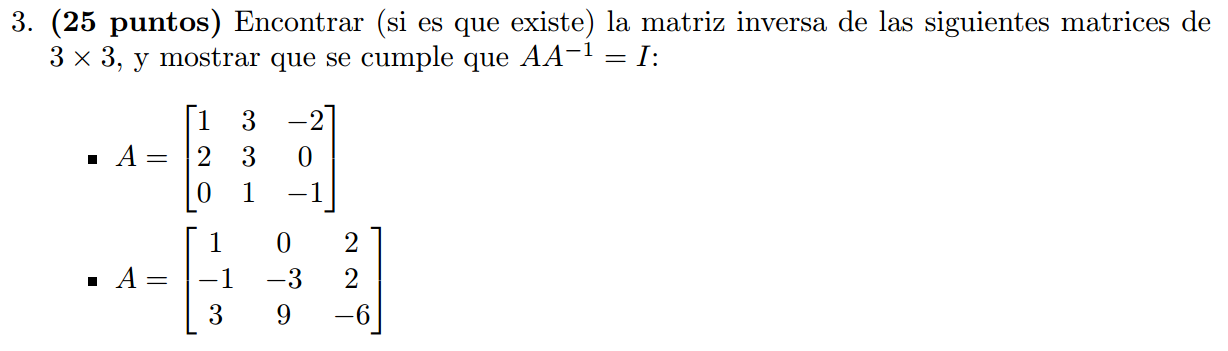

In [ ]:
# PRIMER PROBLEMA 

# Paso 1: Definir la matriz A
print("\nPaso 1: Definir la matriz A")
A1_lista = [[1,  3, -2],
            [2,  3,  0],
            [0,  1, -1]]
A1 = sympy.Matrix(A1_lista)
display(A1)


# Paso 2: Calcular el determinante de A1
print("\nPaso 2: Calcular el determinante de A1")
det_A1 = A1.det()
print(f"det(A1) = {det_A1}")

# Paso 3: Calcular la matriz de menores M_ij
# El menor M_ij es el determinante de la submatriz obtenida al eliminar la fila i y la columna j.
print("\nPaso 3a: Calcular la matriz de menores M_ij")
matriz_menores_A1 = sympy.zeros(3, 3) # Crea una matriz de ceros de 3x3

for r in range(A1.rows): # r para fila (row)
        for c in range(A1.cols): # c para columna (column)
            # A1.minor_matrix(r, c) devuelve la submatriz eliminando fila r y columna c
            # .det() calcula el determinante de esa submatriz
            matriz_menores_A1[r, c] = A1.minorMatrix(r, c).det()
    
print("Matriz de Menores de A1 =")
display(matriz_menores_A1)


# Paso 4: Calcular la matriz de cofactores C_ij = (-1)^(i+j) * M_ij
print("\nPaso 4: Calcular la matriz de cofactores C_ij")

# Alternativamente, SymPy puede calcular esto directamente con: matriz_cofactores_A1 = A1.cofactor_matrix()
matriz_cofactores_A1 = sympy.zeros(A1.rows, A1.cols)
for r in range(A1.rows):
        for c in range(A1.cols):
            matriz_cofactores_A1[r, c] = ((-1)**(r + c)) * matriz_menores_A1[r, c]
            
print("Matriz de Cofactores de A1 =")
display(matriz_cofactores_A1)


# Paso 5: Calcular la matriz adjunta Adj(A1)
# La adjunta es la transpuesta de la matriz de cofactores.
print("\nPaso 5: Calcular la matriz adjunta Adj(A1) = Transpuesta(Matriz de Cofactores)")
# Alternativamente, SymPy puede calcular esto directamente con: adj_A1 = A1.adjugate()
adj_A1 = matriz_cofactores_A1.T # .T es para la transpuesta
print("Adj(A1) =")
display(adj_A1)


# Paso 6: Calcular la inversa A1_inv = (1/det(A1)) * Adj(A1)
print("\nPaso 6: Calcular la matriz inversa A1^(-1) = (1/det(A1)) * Adj(A1)")
A1_inversa = (sympy.Rational(1, det_A1)) * adj_A1 # Usar sympy.Rational para evitar problemas de punto flotante si det_A1 no es 1 o -1
print("A1_inversa = (1/", det_A1, ") * Adj(A1) =")
display(A1_inversa)


# Paso 7: Verificar que A1 * A1_inversa = I (matriz identidad)
print("\nPaso 7: Verificar que A1 * A1_inversa = I")
producto_verificacion = A1 * A1_inversa
print("A1 * A1_inversa =")
display(producto_verificacion)


# Paso 8: User el método directo de SymPy para calcular la inversa para comparar
print("\nComparación con el cálculo directo de la inversa usando A1.inv():")
sympy_inversa_directa = A1.inv()
display(sympy_inversa_directa)



Paso 1: Definir la matriz A


Matrix([
[1, 3, -2],
[2, 3,  0],
[0, 1, -1]])


Paso 2: Calcular el determinante de A1
det(A1) = -1

Paso 3a: Calcular la matriz de menores M_ij
Matriz de Menores de A1 =


Matrix([
[-3, -2,  2],
[-1, -1,  1],
[ 6,  4, -3]])


Paso 4: Calcular la matriz de cofactores C_ij
Matriz de Cofactores de A1 =


Matrix([
[-3,  2,  2],
[ 1, -1, -1],
[ 6, -4, -3]])


Paso 5: Calcular la matriz adjunta Adj(A1) = Transpuesta(Matriz de Cofactores)
Adj(A1) =


Matrix([
[-3,  1,  6],
[ 2, -1, -4],
[ 2, -1, -3]])


Paso 6: Calcular la matriz inversa A1^(-1) = (1/det(A1)) * Adj(A1)
A1_inversa = (1/ -1 ) * Adj(A1) =


Matrix([
[ 3, -1, -6],
[-2,  1,  4],
[-2,  1,  3]])


Paso 7: Verificar que A1 * A1_inversa = I
A1 * A1_inversa =


Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])


Comparación con el cálculo directo de la inversa usando A1.inv():


Matrix([
[ 3, -1, -6],
[-2,  1,  4],
[-2,  1,  3]])

In [83]:
# SEGUNDO PROBLEMA 

print("\nPaso 1: Definir la matriz A (llamémosla A2)")
A2_lista = [[ 1,  0,  2],
            [-1, -3,  2],
            [ 3,  9, -6]]
A2 = sympy.Matrix(A2_lista)
print("A2 =")
display(A2)

# Paso 2: Calcular el determinante de A2
print("\nPaso 2: Calcular el determinante de A2")
det_A2 = A2.det()
print(f"det(A2) = {det_A2}")

# Paso 3: Calcular la matriz de menores M_ij
print("\nPaso 3a: Calcular la matriz de menores M_ij para A2")
matriz_menores_A2 = sympy.zeros(A2.rows, A2.cols)
for r in range(A2.rows):
        for c in range(A2.cols):
            matriz_menores_A2[r, c] = A2.minorMatrix(r, c).det()
    
print("Matriz de Menores de A2 =")
display(matriz_menores_A2)


# Paso 4: Calcular la matriz de cofactores C_ij = (-1)^(i+j) * M_ij
print("\nPaso 4: Calcular la matriz de cofactores C_ij para A2")
matriz_cofactores_A2 = sympy.zeros(A2.rows, A2.cols)
for r in range(A2.rows):
        for c in range(A2.cols):
            matriz_cofactores_A2[r, c] = ((-1)**(r + c)) * matriz_menores_A2[r, c]
            
print("Matriz de Cofactores de A2 =")
display(matriz_cofactores_A2)


# Paso 5: Calcular la matriz adjunta Adj(A2)
print("\nPaso 5: Calcular la matriz adjunta Adj(A2) = Transpuesta(Matriz de Cofactores)")
adj_A2 = matriz_cofactores_A2.T
print("Adj(A2) =")
display(adj_A2)

# Paso 6: Calcular la inversa A2_inv = (1/det(A2)) * Adj(A2)
print("\nPaso 6: Calcular la matriz inversa A2^(-1) = (1/det(A2)) * Adj(A2)")
A2_inversa = (sympy.Rational(1, det_A2)) * adj_A2 # Esto daría error de división por cero
print("A2_inversa = (1/", det_A2, ") * Adj(A2) =")
display(A2_inversa)

# Paso 7: Verificar que A2 * A2_inversa = I (matriz identidad)
print("\nPaso 7: Verificar que A2 * A2_inversa = I")
producto_verificacion_A2 = A2 * A2_inversa
print("A2 * A2_inversa =")
display(producto_verificacion_A2)

# Paso 8: User el método directo de SymPy para calcular la inversa para comparar
print("\nIntentando calcular la inversa de A2 directamente con A2.inv():")
try:
    A2_inversa_directa = A2.inv()
    # Si la matriz fuera invertible, se imprimiría aquí:
    print("Inversa calculada directamente por SymPy para A2:")
    sympy.pprint(A2_inversa_directa)
except NonInvertibleMatrixError: # Usando la excepción importada correctamente
    print("Error de SymPy (NonInvertibleMatrixError desde sympy.matrices.exceptions): La matriz A2 no es invertible (singular). Esto es consistente con que el determinante es 0.")
except Exception as e: # Captura cualquier otra excepción inesperada (no debería ocurrir ahora)
    print(f"Se capturó una excepción inesperada: {type(e).__name__} - {e}")


Paso 1: Definir la matriz A (llamémosla A2)
A2 =


Matrix([
[ 1,  0,  2],
[-1, -3,  2],
[ 3,  9, -6]])


Paso 2: Calcular el determinante de A2
det(A2) = 0

Paso 3a: Calcular la matriz de menores M_ij para A2
Matriz de Menores de A2 =


Matrix([
[  0,   0,  0],
[-18, -12,  9],
[  6,   4, -3]])


Paso 4: Calcular la matriz de cofactores C_ij para A2
Matriz de Cofactores de A2 =


Matrix([
[ 0,   0,  0],
[18, -12, -9],
[ 6,  -4, -3]])


Paso 5: Calcular la matriz adjunta Adj(A2) = Transpuesta(Matriz de Cofactores)
Adj(A2) =


Matrix([
[0,  18,  6],
[0, -12, -4],
[0,  -9, -3]])


Paso 6: Calcular la matriz inversa A2^(-1) = (1/det(A2)) * Adj(A2)
A2_inversa = (1/ 0 ) * Adj(A2) =


Matrix([
[0, zoo, zoo],
[0, zoo, zoo],
[0, zoo, zoo]])


Paso 7: Verificar que A2 * A2_inversa = I
A2 * A2_inversa =


Matrix([
[0, nan, nan],
[0, nan, nan],
[0, nan, nan]])


Intentando calcular la inversa de A2 directamente con A2.inv():
Error de SymPy (NonInvertibleMatrixError desde sympy.matrices.exceptions): La matriz A2 no es invertible (singular). Esto es consistente con que el determinante es 0.


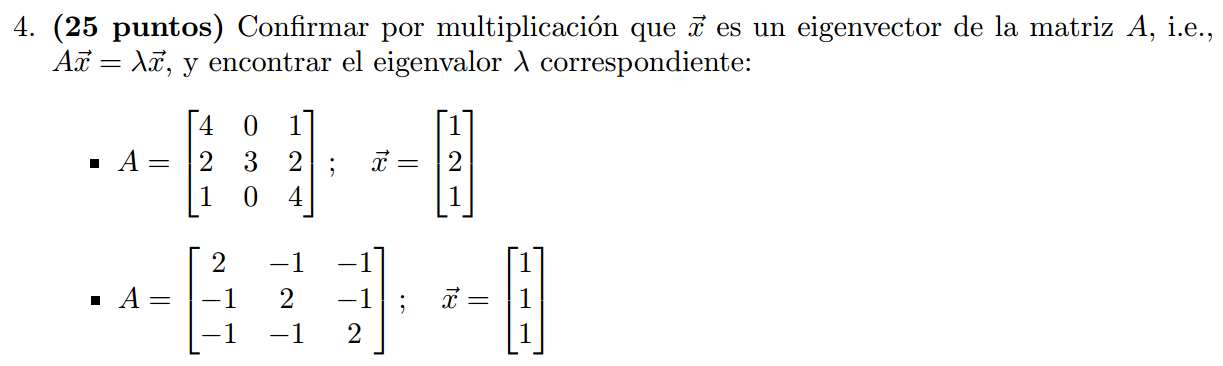

In [97]:
# PRIMER PROBLEMA 

# Paso 1: Definier la matriz A y el vector x 
A1 = sympy.Matrix([
    [4, 0, 1],
    [2, 3, 2],
    [1, 0, 4]
])
print("\nMatriz A1:")
display(A1)

x1 = sympy.Matrix([
    [1],
    [2],
    [1]
])
print("\nVector x1:")
display(x1)

# Paso 2: Calcular el producto A*x

# Calcular A1*x1
Ax1 = A1 * x1
print("\nProducto A1*x1:")
display(Ax1)


# Paso 3: Encontrar el eigenvalor lambda1

# Si Ax1 = lambda1 * x1, entonces lambda1 = (Ax1)[i] / x1[i] para cualquier componente i donde x1[i] no sea cero.
# Tomemos la primera componente (índice 0):

lambda1_calculado = None
# Intentamos calcular lambda1 con la primera componente no nula de x1
for i in range(x1.rows):
    if x1[i] != 0:
        lambda1_calculado = Ax1[i] / x1[i]
        print(f"\nPosible eigenvalor lambda1 (usando la componente {i+1} de x1: {x1[i]} y Ax1: {Ax1[i]}): {lambda1_calculado}")
        break # Encontramos un lambda, salimos del bucle

if lambda1_calculado is None:
    # Esto solo ocurriría si x1 es el vector cero, lo cual no es un eigenvector.
    # O si Ax1 es el vector cero y x1 no lo es, entonces lambda sería 0.
    # Si Ax1 es cero y x1 no es cero, podemos inferir que lambda es 0.
    if Ax1.is_zero_matrix and not x1.is_zero_matrix:
        lambda1_calculado = sympy.Integer(0)
        print(f"\nAx1 es el vector cero y x1 no lo es, por lo tanto, lambda1 = {lambda1_calculado}")
    else:
        print("\nNo se pudo determinar lambda1 (x1 podría ser el vector cero o hay un caso no cubierto).")
        # En este problema específico, sabemos que x1 no es cero.


# Paso 4: Confirmar que A1*x1 = lambda1*x1
if lambda1_calculado is not None:
    lambda1_x1_verificacion = lambda1_calculado * x1
    print(f"\nProducto lambda1_calculado ({lambda1_calculado}) * x1:")
    display(lambda1_x1_verificacion)

    if Ax1 == lambda1_x1_verificacion:
        print(f"\nConfirmado: A1*x1 es igual a lambda1*x1.")
        print(f"Por lo tanto, x1 es un eigenvector de A1 con eigenvalor lambda1 = {lambda1_calculado}.")
    else:
        # Esto podría pasar si Ax1 no es un múltiplo escalar de x1.
        print(f"\nError de confirmación: A1*x1 ({Ax1.T}) NO es un múltiplo escalar de x1 ({x1.T}).")
        print(f"x1 no es un eigenvector de A1.")
else:
    print(f"\nNo se pudo realizar la confirmación porque lambda1 no fue determinado.")     



Matriz A1:


Matrix([
[4, 0, 1],
[2, 3, 2],
[1, 0, 4]])


Vector x1:


Matrix([
[1],
[2],
[1]])


Producto A1*x1:


Matrix([
[ 5],
[10],
[ 5]])


Posible eigenvalor lambda1 (usando la componente 1 de x1: 1 y Ax1: 5): 5

Producto lambda1_calculado (5) * x1:


Matrix([
[ 5],
[10],
[ 5]])


Confirmado: A1*x1 es igual a lambda1*x1.
Por lo tanto, x1 es un eigenvector de A1 con eigenvalor lambda1 = 5.


In [98]:
# SEGUND PROBLEMA 

# Paso 1: Definier la matriz A y el vector x 

# Definir la matriz A
A2 = sympy.Matrix([
    [ 2, -1, -1],
    [-1,  2, -1],
    [-1, -1,  2]
])
print("\nMatriz A2:")
display(A2)

# Definir el vector x
x2 = sympy.Matrix([
    [1],
    [1],
    [1]
])
print("\nVector x2:")
display(x2)


# Paso 2: Calcular el producto A*x.

# Calcular A2*x2
Ax2 = A2 * x2
print("\nProducto A2*x2:")
display(Ax2)


# Paso 3: Encontrar el eigenvalor lambda2

lambda2_calculado = None
# Intentamos calcular lambda2 con la primera componente no nula de x2
for i in range(x2.rows):
    if x2[i] != 0:
        lambda2_calculado = Ax2[i] / x2[i]
        print(f"\nPosible eigenvalor lambda2 (usando la componente {i+1} de x2: {x2[i]} y Ax2: {Ax2[i]}): {lambda2_calculado}")
        break

if lambda2_calculado is None:
    if Ax2.is_zero_matrix and not x2.is_zero_matrix:
        lambda2_calculado = sympy.Integer(0)
        print(f"\nAx2 es el vector cero y x2 no lo es, por lo tanto, lambda2 = {lambda2_calculado}")
    else:
        print("\nNo se pudo determinar lambda2 (x2 podría ser el vector cero o hay un caso no cubierto).")

# Paso 4: Confirmar que A2*x2 = lambda2*x2
if lambda2_calculado is not None:
    lambda2_x2_verificacion = lambda2_calculado * x2
    print(f"\nProducto lambda2_calculado ({lambda2_calculado}) * x2:")
    display(lambda2_x2_verificacion)

    if Ax2 == lambda2_x2_verificacion:
        print(f"\nConfirmado: A2*x2 es igual a lambda2*x2.")
        print(f"Por lo tanto, x2 es un eigenvector de A2 con eigenvalor lambda2 = {lambda2_calculado}.")
    else:
        print(f"\nError de confirmación: A2*x2 ({Ax2.T}) NO es un múltiplo escalar de x2 ({x2.T}).")
        print(f"x2 no es un eigenvector de A2.")
else:
    print(f"\nNo se pudo realizar la confirmación porque lambda2 no fue determinado.")



Matriz A2:


Matrix([
[ 2, -1, -1],
[-1,  2, -1],
[-1, -1,  2]])


Vector x2:


Matrix([
[1],
[1],
[1]])


Producto A2*x2:


Matrix([
[0],
[0],
[0]])


Posible eigenvalor lambda2 (usando la componente 1 de x2: 1 y Ax2: 0): 0

Producto lambda2_calculado (0) * x2:


Matrix([
[0],
[0],
[0]])


Confirmado: A2*x2 es igual a lambda2*x2.
Por lo tanto, x2 es un eigenvector de A2 con eigenvalor lambda2 = 0.
